# Proyecto 1 - Data analytics - NBA Play-by-play data

## 1. Alcance del Proyecto

Este Cuaderno de Jupyter se centra en explorar y analizar los datos de jugada por jugada de la NBA, que consisten en registros detallados de eventos de partidos de baloncesto. El conjunto de datos contiene 646,367 entradas y abarca varias columnas que capturan diversos aspectos de cada jugada, incluyendo:

* Detalles Temporales: Identificadores de partidos, período y el tiempo del reloj cuando ocurrieron los eventos.
* Puntuación: Puntos anotados por los equipos local y visitante hasta el evento.
* Participantes: Equipos, jugadores e identificadores únicos.
* Tipos de Eventos: Descripciones de los tipos de jugadas, subtipos específicos y resultados.
* Ubicación y Distancia: Coordenadas en la cancha X e Y y distancia al aro.
* Narrativa: Descripciones textuales que proporcionan contexto para cada jugada.
* Información de la Temporada: La temporada de la NBA en la que tuvieron lugar los eventos.

### Objetivos

El objetivo principal de este cuaderno es limpiar, preparar y visualizar los datos para extraer conocimientos significativos sobre las actuaciones de los jugadores, la dinámica del juego y los patrones de puntuación a través de diferentes períodos y temporadas.

Objetivos Clave
1. Limpieza de Datos: Abordar valores faltantes, registros duplicados y corregir formatos de datos, particularmente para el campo 'clock' que registra el tiempo en un formato especializado.
2. Enriquecimiento de Datos: Mejorar el conjunto de datos con campos calculados como los puntos totales y etapas del juego categorizadas (por ejemplo, tiempo regular vs. tiempo extra).
3. Análisis Exploratorio: Utilizar técnicas estadísticas y gráficas para explorar relaciones y patrones en los datos.

### Descripcion de las columnas del dataset

1. gameid: Esta columna almacena un identificador único para cada juego. Este ID se puede usar para referenciar juegos específicos en el conjunto de datos.
2. period: Indica el período del juego durante el cual ocurrió el evento. En la NBA, hay cuatro períodos (cuartos) en un juego regular y períodos adicionales de tiempo extra si son necesarios.
3. clock: Representa el reloj del juego en el momento del evento, típicamente formateado como minutos:segundos (por ejemplo, 02:15 para dos minutos y quince segundos restantes en el período).
4. h_pts: Muestra los puntos totales anotados por el equipo local hasta ese momento en el juego.
5. a_pts: Muestra los puntos totales anotados por el equipo visitante hasta ese momento en el juego.
6. team: El equipo que ejecutó la jugada. Esto podría ser el equipo local o visitante y a menudo se representa por la abreviatura del equipo o la ciudad.
7. playerid: Un identificador único para el jugador involucrado en la jugada. Esto se puede usar para vincular con otras fuentes de datos para obtener información detallada del jugador.
8. player: El nombre del jugador involucrado en la jugada. Esto podría ser para acciones como tiros, faltas, pérdidas de balón, etc.
9. type: La categoría general de la jugada, como tiro, falta, pérdida de balón, rebote, etc.
10. subtype: Detalle más específico sobre el tipo de jugada, por ejemplo, un tiro podría tener subtipos como tiro de tres puntos o clavada.
11. result: El resultado de la jugada, como convertido o fallado para tiros, falta señalada, etc.
12. x: La coordenada x en la cancha donde ocurrió la jugada, típicamente utilizando el sistema de medio campo donde una canasta está en cero y la otra en el extremo opuesto de la escala x.
13. y: La coordenada y en la cancha, proporcionando una medición perpendicular a la coordenada x para localizar precisamente donde ocurrió el evento en la cancha.
14. dist: La distancia al aro donde ocurrió el evento, a menudo relevante para intentos de tiro.
15. desc: Una descripción textual de la jugada, ofreciendo detalles no capturados por los datos estructurados en otras columnas. Esto puede incluir acciones de los jugadores, reacciones y otros elementos notables de la jugada.
16. season: La temporada de la NBA durante la cual se jugó el partido, típicamente formateada como el año de inicio de la temporada (por ejemplo, 2021 para la temporada 2021-2022).

### Preguntas 

1. Cuales son los jugadores con mayor cantidad de tiros exitosos y tiros fallados por periodos

2. Que equipos obtienen mas puntos por periodo? Que variables afectan el patron de puntos anotados a lo largo de un juego?

3. Como varia el rendimiento de los jugadores en diferentes periodos del juego?

4. Que tipos de disparos son los mas efectivos? y cuales los menos efectivos

5. Que tan efectivos son algunos jugadores al hacer 'rebound', 'block' o 'steal'?

6. Como se comparan las contribuciones en defensa con las contribuciones en ofensiva de los equipos?

7. Quienes son los defensores top en la liga?

8. En que posicion del campo ocurren mas jugadas?

9. Puntos totales de ambos equipos por partido en promedio

## 2. Análisis Exploratorio de Datos (EDA)


### 2.1. Obtener los datos

Datos jugada por jugada extraídos de NBA.com de la últimas temporadas 2023, que incluyen:

* 646,198 en eventos de juegos
* 1,319 juegos
* 280,989 disparos

Fuente: https://www.kaggle.com/datasets/szymonjwiak/nba-play-by-play-data-1997-2023?select=pbp2023.csv

In [2]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re # regex

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import TargetEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline


pd.set_option('display.max_columns', None)

In [3]:
# Lectura de archivo csv con el dataset
nba_data = pd.read_csv('data/pbp2023.csv')


### 2.2. Exploración y Limpieza de Datos

Antes de comenzar con el análisis exploratorio de datos (EDA), es fundamental realizar una serie de actividades preliminares para entender mejor el conjunto de datos y prepararlo adecuadamente. Primero, exploraremos los datos examinando sus primeras filas para obtener una vista preliminar, verificando los tipos de datos de cada columna y detectando la presencia de datos faltantes. Esta etapa nos permitirá comprender la estructura y el tamaño del conjunto de datos. A continuación, pasaremos a la limpieza de datos, donde abordaremos cualquier valor faltante, identificaremos y gestionaremos los valores atípicos y corregiremos datos inconsistentes. Estas actividades iniciales son cruciales para asegurar que el conjunto de datos esté en condiciones óptimas para un análisis más profundo y preciso.

**Visualizar las primeras filas del conjunto de datos**

Exploracion inicial de los datos

In [4]:
nba_data.head()

,gameid,period,clock,h_pts,a_pts,team,playerid,player,type,subtype,result,x,y,dist,desc,season
0,22200001,1,PT12M00.00S,0.0,0.0,NaN,0,NaN,period,start,NaN,0,0,0,Start of 1st Period (7:36 PM EST),2023
1,22200001,1,PT12M00.00S,NaN,NaN,BOS,201143,A. Horford,Jump Ball,NaN,NaN,0,0,0,Jump Ball Horford vs. Embiid: Tip to Harris,2023
2,22200001,1,PT11M38.00S,NaN,NaN,PHI,203954,J. Embiid,Missed Shot,Turnaround Fadeaway shot,Missed,-118,50,13,MISS Embiid 13' Turnaround Fadeaway Shot,2023
3,22200001,1,PT11M38.00S,NaN,NaN,BOS,1627759,J. Brown,NaN,NaN,NaN,0,0,0,Brown BLOCK (1 BLK),2023
4,22200001,1,PT11M35.00S,NaN,NaN,PHI,200782,P. Tucker,Rebound,Unknown,NaN,0,0,0,Tucker REBOUND (Off:1 Def:0),2023


**Verificar la estructura y tamaño del conjunto de datos**

Identificar el tamaño del dataset y el tipo de datos de cada columna

In [5]:
nba_data.shape

(646367, 16)

Al validar los tipos de datos podemos identificar lo siguiente:
* Columna h_pts que tiene los puntos acumulados del local es float y debe ser entero.
* Columna a_pts que tiene los puntos acumulados del visitante es float y debe ser entero.

In [6]:
nba_data.dtypes

gameid        int64
period        int64
clock        object
h_pts       float64
a_pts       float64
team         object
playerid      int64
player       object
type         object
subtype      object
result       object
x             int64
y             int64
dist          int64
desc         object
season        int64
dtype: object

A continuacion se cambia el tipo de datos a entero a h_pts y a_pts, y cambia valores de NAn a 0 a estas variables

In [7]:
# Cambia valores de NAn a estas varables y los convierte a enteros
nba_data['h_pts'] = nba_data['h_pts'].fillna(0).astype(int)
nba_data['a_pts'] = nba_data['a_pts'].fillna(0).astype(int)

**Obtener un resumen estadístico del conjunto de datos**

Al realizar el .describe() podemos identificar inicialmente:

* La columna season tiene un único valor 2023

In [8]:
nba_data.describe()

,gameid,period,h_pts,a_pts,playerid,x,y,dist,season
count,6.463670e+05,646367.000000,646367.000000,646367.000000,6.463670e+05,646367.000000,646367.000000,646367.000000,646367.0
mean,2.358362e+07,2.532608,15.927670,15.533740,9.619604e+07,-0.695065,34.103161,4.527672,2023.0
std,5.210566e+06,1.135909,31.955861,31.228907,3.792997e+08,68.013837,72.468474,8.852326,0.0
min,2.220000e+07,1.000000,0.000000,0.000000,0.000000e+00,-249.000000,-52.000000,0.000000,2023.0
25%,2.220033e+07,2.000000,0.000000,0.000000,2.039520e+05,0.000000,0.000000,0.000000,2023.0
50%,2.220066e+07,3.000000,0.000000,0.000000,1.628972e+06,0.000000,0.000000,0.000000,2023.0
75%,2.220099e+07,4.000000,7.000000,7.000000,1.630183e+06,0.000000,19.000000,3.000000,2023.0
max,5.220021e+07,6.000000,175.000000,176.000000,1.610613e+09,250.000000,820.000000,82.000000,2023.0


Vamos a eliminar la columna season ya que tiene un solo valor

In [9]:
# Verificar valores unicos de columna 'season'
pd.unique(nba_data['season'])

array([2023])

In [10]:
# Eliminar columna 'season' ya que este dataset solo considera la temporada 2023
nba_data.drop('season',
  axis='columns', inplace=True)
nba_data.head()

,gameid,period,clock,h_pts,a_pts,team,playerid,player,type,subtype,result,x,y,dist,desc
0,22200001,1,PT12M00.00S,0,0,NaN,0,NaN,period,start,NaN,0,0,0,Start of 1st Period (7:36 PM EST)
1,22200001,1,PT12M00.00S,0,0,BOS,201143,A. Horford,Jump Ball,NaN,NaN,0,0,0,Jump Ball Horford vs. Embiid: Tip to Harris
2,22200001,1,PT11M38.00S,0,0,PHI,203954,J. Embiid,Missed Shot,Turnaround Fadeaway shot,Missed,-118,50,13,MISS Embiid 13' Turnaround Fadeaway Shot
3,22200001,1,PT11M38.00S,0,0,BOS,1627759,J. Brown,NaN,NaN,NaN,0,0,0,Brown BLOCK (1 BLK)
4,22200001,1,PT11M35.00S,0,0,PHI,200782,P. Tucker,Rebound,Unknown,NaN,0,0,0,Tucker REBOUND (Off:1 Def:0)


**Identificar datos faltantes**

Comencemos examinando las columnas con una cantidad significativa de valores faltantes, de acuerdo a lo observado:

* h_pts y a_pts solamente tiene valores cuando el evento ha generado una modificación en el marcador, por lo que hace sentido que tengan valores nulos.
* team y player tienen valores nulos para algunos eventos como inicio, fin de periodo, por lo que hace sentido que tengan valores nulos.
* type, subtype, result será analizadas a detalle en los siguientes pasos

In [11]:
# Comencemos examinando las columnas con una cantidad significativa de valores faltantes
missing_data = nba_data.isnull().sum()
print(missing_data[missing_data > 0])

team        51272
player      50515
type        31464
subtype     94962
result     413632
dtype: int64


Para datos categóricos como 'team', 'player', 'type', 'subtype', y 'result' vamos llenar los valores faltantes con un marcador como 'Unknown'

In [ ]:
# Para datos categóricos como 'team', 'player', 'type', 'subtype', y 'result', 

# nba_data['team'].fillna('Unknown', inplace=True)
# nba_data['player'].fillna('Unknown', inplace=True)
# nba_data['type'].fillna('Unknown', inplace=True)
# nba_data['subtype'].fillna('Unknown', inplace=True)

**Verificar la existencia de datos duplicados**

Vamos a identificar y posteriormente eliminar los registros duplicados si existieran.

In [12]:
# Verificar y mostrar duplicados
duplicates = nba_data[nba_data.duplicated(keep=False)]
print("Registros duplicados:")
duplicates.head()

Registros duplicados:


,gameid,period,clock,h_pts,a_pts,team,playerid,player,type,subtype,result,x,y,dist,desc
23928,22200047,3,PT04M53.00S,0,0,NaN,1628210,NaN,Foul,Technical,NaN,0,0,0,Joe Mazzulla Foul:T.FOUL (M.Davis)
23930,22200047,3,PT04M53.00S,0,0,NaN,1628210,NaN,Foul,Technical,NaN,0,0,0,Joe Mazzulla Foul:T.FOUL (M.Davis)
25138,22200049,4,PT01M28.00S,0,0,NaN,1610612763,NaN,Rebound,Unknown,NaN,0,0,0,GRIZZLIES Rebound
25140,22200049,4,PT01M28.00S,0,0,NaN,1610612763,NaN,Rebound,Unknown,NaN,0,0,0,GRIZZLIES Rebound
30447,22200060,3,PT04M24.00S,0,0,NaN,959,S. Nash,Foul,Technical,NaN,0,0,0,Steve Nash Foul:T.FOUL (J.Tiven)


In [13]:
# Eliminar si hay duplicados
duplicates = nba_data.duplicated().sum()
print(f"Número de entradas duplicadas: {duplicates}")
# Si decides eliminar duplicados
if duplicates > 0:
    nba_data = nba_data.drop_duplicates()

Número de entradas duplicadas: 169


**Explorar valores únicos en columnas categóricas**

Vamos a explorar los valores únicos de las siguientes variables:

* team
* player
* type
* subtype
* result
* desc

Podemos observar los siguiente:

* La cantidad de player es 787 registros diferentes.
* type requiere eliminar estacios en blanco en algunos de sus valores. 
* se requiere analizar desc ya que tiene descripciones que podrían ayudas a disminuir los type con Nan

In [14]:
# verificar si hay valores unicos en columna 'team'
print ('Variable: team')
unique_values = np.unique(nba_data['team'].astype(str))
print (unique_values)

# verificar si hay valores unicos en columna 'player'
print ('Variable: player')
unique_values = np.unique(nba_data['player'].astype(str))
print (unique_values)
print (unique_values.shape)

Variable: team
['ATL' 'BKN' 'BOS' 'CHA' 'CHI' 'CLE' 'DAL' 'DEN' 'DET' 'GSW' 'HOU' 'IND'
 'LAC' 'LAL' 'MEM' 'MIA' 'MIL' 'MIN' 'NOP' 'NYK' 'OKC' 'ORL' 'PHI' 'PHX'
 'POR' 'SAC' 'SAS' 'TOR' 'UTA' 'WAS' 'nan']
Variable: player
['A. Avent' 'A. Bowie' 'A. Burks' 'A. Caldwell' 'A. Carr' 'A. Caruso'
 'A. Coffey' 'A. Davis' 'A. DeClercq' 'A. Dosunmu' 'A. Drummond'
 'A. Edwards' 'A. Gill' 'A. Gilliam' 'A. Gordon' 'A. Green' 'A. Griffin'
 'A. Hardaway' 'A. Harvey' 'A. Henderson' 'A. Holiday' 'A. Horford'
 'A. Houston' 'A. Iguodala' 'A. Johnson' 'A. Keefe' 'A. Lamb' 'A. Lang'
 'A. Lawson' 'A. Len' 'A. Lister' 'A. Mason' 'A. McDyess' 'A. Miller'
 'A. Mourning' 'A. Nembhard' 'A. Nesmith' 'A. Pokusevski' 'A. Reaves'
 'A. Rivers' 'A. Sabonis' 'A. Schofield' 'A. Sengun' 'A. Simons'
 'A. Toolson' 'A. Tucker' 'A. Wiggins' 'A. Williams' 'B. Adebayo'
 'B. Barry' 'B. Beal' 'B. Benjamin' 'B. Biyombo' 'B. Boeheim'
 'B. Bogdanovic' 'B. Bol' 'B. Boston Jr.' 'B. Brown' 'B. Clarke'
 'B. Curley' 'B. Dele' 'B. Ferna

In [15]:

# verificar si hay valores unicos en columna 'type'
print ('Variable: type')
unique_values = np.unique(nba_data['type'].astype(str))
print (unique_values)

# verificar si hay valores unicos en columna 'subtype'
print ('Variable: subtype')
unique_values = np.unique(nba_data['subtype'].astype(str))
print (unique_values)

# verificar si hay valores unicos en columna 'result'
print ('Variable: result')
unique_values = np.unique(nba_data['result'].astype(str))
print (unique_values)



Variable: type
['Ejection' 'Foul' 'Foul                                    ' 'Free Throw'
 'Instant Replay' 'Instant Replay                          ' 'Jump Ball'
 'Made Shot' 'Missed Shot' 'Rebound' 'Substitution' 'Timeout' 'Turnover'
 'Turnover                                ' 'Violation' 'nan' 'period']
Variable: subtype
[' ' '3 Second Violation' '5 Second Violation' '8 Second Violation'
 'Alley Oop Dunk Shot' 'Alley Oop Layup shot' 'Altercation Ruling'
 'Away From Play' 'Backcourt Turnover' 'Bad Pass'
 'Basket from Below Turnover' 'Clear Path' 'Coach Challenge'
 'Coach Challenge Overturn Ruling' 'Coach Challenge Ruling Stands'
 'Coach Challenge Support Ruling' 'Cutting Dunk Shot'
 'Cutting Finger Roll Layup Shot' 'Cutting Layup Shot' 'Defense 3 Second'
 'Defensive Goaltending' 'Delay Of Game' 'Delay Technical'
 'Discontinue Dribble' 'Double Dribble' 'Double Lane' 'Double Personal'
 'Double Technical' 'Driving Bank Hook Shot' 'Driving Dunk Shot'
 'Driving Finger Roll Layup Shot' 'Dr

In [16]:
# verificar si hay valores unicos en columna 'desc'
print ('Variable: desc')
unique_values = np.unique(nba_data['desc'].astype(str))
print (unique_values)

Variable: desc
[' ' ' Foul : Double Personal - Allen (4 PF), Davis (4 PF) (J.Orr)'
 ' Foul : Double Personal - Biyombo (2 PF), Sharpe (1 PF) (E.Lewis)' ...
 'Zubac Violation:Kicked Ball (J.Goldenberg)'
 'Zubac Violation:Kicked Ball (M.Davis)'
 'Zubac Violation:Kicked Ball (P.Fraher)']


A continuacion se eliminan los espacios en blanco de type y se valida nuevamente:

In [17]:
# Eliminar espacios al principio y al final de las cadenas en la columna 'type'
nba_data['type'] = nba_data['type'].str.strip()

print ('Variable: type')
unique_values = np.unique(nba_data['type'].astype(str))
print (unique_values)


Variable: type
['Ejection' 'Foul' 'Free Throw' 'Instant Replay' 'Jump Ball' 'Made Shot'
 'Missed Shot' 'Rebound' 'Substitution' 'Timeout' 'Turnover' 'Violation'
 'nan' 'period']


### 2.2. Feature engineering

En esta etapa vamos a utilizar el conocimiento de dataset en base al análisis previo para extraer características (variables) de los datos brutos que permiten a los algoritmos de aprendizaje automático tenga mejores resultados.


**Convertir formato de 'clock' para extraer minutos y segundos**

Extraemos los minutos y los segundos usando expresiones regulares:

In [18]:
# Convertir el formato de 'clock' de PT12M00.00S a minutos y segundos
# Extraemos los minutos y los segundos usando expresiones regulares

def parse_time(time_str):
    match = re.match(r'PT(\d+)M(\d+)\.\d+S', time_str)
    if match:
        return int(match.group(1)), int(match.group(2))
    return np.nan, np.nan  # Retorna NaN si no hay coincidencia

# Primero, aseguremos que estamos trabajando con un Dataframe completo, no un slice
nba_data = nba_data.copy()
# Aplicar la función para crear las columnas de minutos y segundos
nba_data['minutes'], nba_data['seconds'] = zip(*nba_data['clock'].apply(parse_time))

nba_data.head()

,gameid,period,clock,h_pts,a_pts,team,playerid,player,type,subtype,result,x,y,dist,desc,minutes,seconds
0,22200001,1,PT12M00.00S,0,0,NaN,0,NaN,period,start,NaN,0,0,0,Start of 1st Period (7:36 PM EST),12,0
1,22200001,1,PT12M00.00S,0,0,BOS,201143,A. Horford,Jump Ball,NaN,NaN,0,0,0,Jump Ball Horford vs. Embiid: Tip to Harris,12,0
2,22200001,1,PT11M38.00S,0,0,PHI,203954,J. Embiid,Missed Shot,Turnaround Fadeaway shot,Missed,-118,50,13,MISS Embiid 13' Turnaround Fadeaway Shot,11,38
3,22200001,1,PT11M38.00S,0,0,BOS,1627759,J. Brown,NaN,NaN,NaN,0,0,0,Brown BLOCK (1 BLK),11,38
4,22200001,1,PT11M35.00S,0,0,PHI,200782,P. Tucker,Rebound,Unknown,NaN,0,0,0,Tucker REBOUND (Off:1 Def:0),11,35


**Agregar variable de total puntos acumulados**

Se calcula de puntos acumulados sumando h_pts + a_pts

In [19]:
# Crear una nueva característica para puntos totales si es necesario
nba_data['total_pts'] = nba_data['h_pts'] + nba_data['a_pts']
nba_data.head()

,gameid,period,clock,h_pts,a_pts,team,playerid,player,type,subtype,result,x,y,dist,desc,minutes,seconds,total_pts
0,22200001,1,PT12M00.00S,0,0,NaN,0,NaN,period,start,NaN,0,0,0,Start of 1st Period (7:36 PM EST),12,0,0
1,22200001,1,PT12M00.00S,0,0,BOS,201143,A. Horford,Jump Ball,NaN,NaN,0,0,0,Jump Ball Horford vs. Embiid: Tip to Harris,12,0,0
2,22200001,1,PT11M38.00S,0,0,PHI,203954,J. Embiid,Missed Shot,Turnaround Fadeaway shot,Missed,-118,50,13,MISS Embiid 13' Turnaround Fadeaway Shot,11,38,0
3,22200001,1,PT11M38.00S,0,0,BOS,1627759,J. Brown,NaN,NaN,NaN,0,0,0,Brown BLOCK (1 BLK),11,38,0
4,22200001,1,PT11M35.00S,0,0,PHI,200782,P. Tucker,Rebound,Unknown,NaN,0,0,0,Tucker REBOUND (Off:1 Def:0),11,35,0


**Agregar variable categorica para identificar si el periodo es regular o tiempo extra**

Si el periodo es menor igual que 4 es tiempo regular caso contratio es tiempo extra


In [20]:
# Crear una columna categórica para períodos para manejar tiempos extras de manera distinta
nba_data['game_stage'] = np.where(nba_data['period'] <= 4, 'Regular', 'Overtime')
nba_data.head()

,gameid,period,clock,h_pts,a_pts,team,playerid,player,type,subtype,result,x,y,dist,desc,minutes,seconds,total_pts,game_stage
0,22200001,1,PT12M00.00S,0,0,NaN,0,NaN,period,start,NaN,0,0,0,Start of 1st Period (7:36 PM EST),12,0,0,Regular
1,22200001,1,PT12M00.00S,0,0,BOS,201143,A. Horford,Jump Ball,NaN,NaN,0,0,0,Jump Ball Horford vs. Embiid: Tip to Harris,12,0,0,Regular
2,22200001,1,PT11M38.00S,0,0,PHI,203954,J. Embiid,Missed Shot,Turnaround Fadeaway shot,Missed,-118,50,13,MISS Embiid 13' Turnaround Fadeaway Shot,11,38,0,Regular
3,22200001,1,PT11M38.00S,0,0,BOS,1627759,J. Brown,NaN,NaN,NaN,0,0,0,Brown BLOCK (1 BLK),11,38,0,Regular
4,22200001,1,PT11M35.00S,0,0,PHI,200782,P. Tucker,Rebound,Unknown,NaN,0,0,0,Tucker REBOUND (Off:1 Def:0),11,35,0,Regular


**Analizar columna "desc" para en base a su valores actualizar "type"**


1.  Identificar los Bloqueos de acuerdo a los valores en la columna 'desc' que tengan el formato 'Brown BLOCK (1 BLK)' y actualizar en la columna 'type'. 

In [21]:
# Actualizar la columna 'type' si es que la columna 'desc' contiene la palabra 'BLOCK'

nba_data['type'] = nba_data.apply(lambda row: 'Block' if 'BLOCK' in row['desc'] else row['type'], axis=1)
nba_data[nba_data['type']=='Block'].head()



,gameid,period,clock,h_pts,a_pts,team,playerid,player,type,subtype,result,x,y,dist,desc,minutes,seconds,total_pts,game_stage
3,22200001,1,PT11M38.00S,0,0,BOS,1627759,J. Brown,Block,NaN,NaN,0,0,0,Brown BLOCK (1 BLK),11,38,0,Regular
17,22200001,1,PT10M12.00S,0,0,BOS,1628369,J. Tatum,Block,NaN,NaN,0,0,0,Tatum BLOCK (1 BLK),10,12,0,Regular
22,22200001,1,PT10M04.00S,0,0,PHI,203954,J. Embiid,Block,NaN,NaN,0,0,0,Embiid BLOCK (1 BLK),10,4,0,Regular
35,22200001,1,PT09M14.00S,0,0,PHI,200782,P. Tucker,Block,NaN,NaN,0,0,0,Tucker BLOCK (1 BLK),9,14,0,Regular
92,22200001,1,PT03M49.00S,0,0,PHI,1626149,M. Harrell,Block,NaN,NaN,0,0,0,Harrell BLOCK (1 BLK),3,49,0,Regular


Agregar nueva columna **'block_number'** para indicar el numero de bloqueos acumulados hasta evento en base a la información de la columna 'desc' 

In [22]:
# Extrae el numero de la columna 'desc' si contiene la palabra 'BLOCK'
def extract_block_number(desc):
    if 'BLOCK' in desc:
        # Busca uno o mas digitos dentro del parentesis despues de 'BLOCK'
        match = re.search(r'BLOCK \((\d+) BLK\)', desc)
        if match:
            return int(match.group(1))
    return 0

# Aplicar la funcion para crear una columna 'block_number'
nba_data['block_number'] = nba_data['desc'].apply(extract_block_number)

nba_data[nba_data['type']=='Block'].head()

,gameid,period,clock,h_pts,a_pts,team,playerid,player,type,subtype,result,x,y,dist,desc,minutes,seconds,total_pts,game_stage,block_number
3,22200001,1,PT11M38.00S,0,0,BOS,1627759,J. Brown,Block,NaN,NaN,0,0,0,Brown BLOCK (1 BLK),11,38,0,Regular,1
17,22200001,1,PT10M12.00S,0,0,BOS,1628369,J. Tatum,Block,NaN,NaN,0,0,0,Tatum BLOCK (1 BLK),10,12,0,Regular,1
22,22200001,1,PT10M04.00S,0,0,PHI,203954,J. Embiid,Block,NaN,NaN,0,0,0,Embiid BLOCK (1 BLK),10,4,0,Regular,1
35,22200001,1,PT09M14.00S,0,0,PHI,200782,P. Tucker,Block,NaN,NaN,0,0,0,Tucker BLOCK (1 BLK),9,14,0,Regular,1
92,22200001,1,PT03M49.00S,0,0,PHI,1626149,M. Harrell,Block,NaN,NaN,0,0,0,Harrell BLOCK (1 BLK),3,49,0,Regular,1


2.  Identificar los REBOUND de acuerdo a los valores en la columna 'desc' que tengan el formato 'Tatum REBOUND (Off:0 Def:1)' y agregar columna **'off_rebounds'** para identificar los REBOUND acumulados hasta este evento. 


In [23]:
def extract_rebounds(desc):
    if 'REBOUND' in desc:
        # Buscar los patrones "Off:x" y "Def:y"
        off_match = re.search(r'Off:(\d+)', desc)
        def_match = re.search(r'Def:(\d+)', desc)
        # Extraer rebounds off y def si se encuentran coincidencias
        off_rebounds = int(off_match.group(1)) if off_match else 0
        def_rebounds = int(def_match.group(1)) if def_match else 0
        return off_rebounds, def_rebounds
    return 0, 0

# Aplicar la funcion a la columna 'desc' y crear dos nuevas columnas
nba_data['off_rebounds'], nba_data['def_rebounds'] = zip(*nba_data['desc'].apply(extract_rebounds))

nba_data[nba_data['type'] == 'Rebound'].head()

,gameid,period,clock,h_pts,a_pts,team,playerid,player,type,subtype,result,x,y,dist,desc,minutes,seconds,total_pts,game_stage,block_number,off_rebounds,def_rebounds
4,22200001,1,PT11M35.00S,0,0,PHI,200782,P. Tucker,Rebound,Unknown,NaN,0,0,0,Tucker REBOUND (Off:1 Def:0),11,35,0,Regular,0,1,0
8,22200001,1,PT11M05.00S,0,0,PHI,202699,T. Harris,Rebound,Unknown,NaN,0,0,0,Harris REBOUND (Off:1 Def:0),11,5,0,Regular,0,1,0
12,22200001,1,PT10M31.00S,0,0,BOS,1628369,J. Tatum,Rebound,Unknown,NaN,0,0,0,Tatum REBOUND (Off:0 Def:1),10,31,0,Regular,0,0,1
18,22200001,1,PT10M12.00S,0,0,NaN,1610612755,NaN,Rebound,Unknown,NaN,0,0,0,76ers Rebound,10,12,0,Regular,0,0,0
20,22200001,1,PT10M07.00S,0,0,BOS,201143,A. Horford,Rebound,Unknown,NaN,0,0,0,Horford REBOUND (Off:0 Def:1),10,7,0,Regular,0,0,1


3.  Identificar los Steal de acuerdo a los valores en la columna 'desc' que tengan el formato 'Knight STEAL (1 STL)' y actualizar en la columna 'type'. 

In [24]:
nba_data['type'] = nba_data.apply(lambda row: 'Steal' if 'STEAL' in row['desc'] else row['type'], axis=1)
nba_data[nba_data['type'] == 'Steal'].head()

,gameid,period,clock,h_pts,a_pts,team,playerid,player,type,subtype,result,x,y,dist,desc,minutes,seconds,total_pts,game_stage,block_number,off_rebounds,def_rebounds
28,22200001,1,PT09M47.00S,0,0,BOS,203935,M. Smart,Steal,NaN,NaN,0,0,0,Smart STEAL (1 STL),9,47,0,Regular,0,0,0
58,22200001,1,PT07M35.00S,0,0,PHI,202699,T. Harris,Steal,NaN,NaN,0,0,0,Harris STEAL (1 STL),7,35,0,Regular,0,0,0
71,22200001,1,PT06M14.00S,0,0,PHI,1630178,T. Maxey,Steal,NaN,NaN,0,0,0,Maxey STEAL (1 STL),6,14,0,Regular,0,0,0
84,22200001,1,PT04M47.00S,0,0,BOS,1627763,M. Brogdon,Steal,NaN,NaN,0,0,0,Brogdon STEAL (1 STL),4,47,0,Regular,0,0,0
124,22200001,1,PT01M42.00S,0,0,PHI,1629001,D. Melton,Steal,NaN,NaN,0,0,0,Melton STEAL (1 STL),1,42,0,Regular,0,0,0


Agregar nueva columna **'steal_number'** para indicar el numero de Steal acumulados hasta evento en base a la información de la columna 'desc' 

In [25]:
# Extrae el numero de la columna 'desc' si contiene la palabra 'STEAL'
def extract_steal_number(desc):
    if 'STEAL' in desc:
        # Busca uno o mas digitos dentro del parentesis despues de 'STEAL'
        match = re.search(r'STEAL \((\d+) STL\)', desc)
        if match:
            return int(match.group(1))
    return 0

# Aplicar la funcion para crear una columna 'steal_number'
nba_data['steal_number'] = nba_data['desc'].apply(extract_steal_number)

nba_data[nba_data['type'] == 'Steal'].head()

,gameid,period,clock,h_pts,a_pts,team,playerid,player,type,subtype,result,x,y,dist,desc,minutes,seconds,total_pts,game_stage,block_number,off_rebounds,def_rebounds,steal_number
28,22200001,1,PT09M47.00S,0,0,BOS,203935,M. Smart,Steal,NaN,NaN,0,0,0,Smart STEAL (1 STL),9,47,0,Regular,0,0,0,1
58,22200001,1,PT07M35.00S,0,0,PHI,202699,T. Harris,Steal,NaN,NaN,0,0,0,Harris STEAL (1 STL),7,35,0,Regular,0,0,0,1
71,22200001,1,PT06M14.00S,0,0,PHI,1630178,T. Maxey,Steal,NaN,NaN,0,0,0,Maxey STEAL (1 STL),6,14,0,Regular,0,0,0,1
84,22200001,1,PT04M47.00S,0,0,BOS,1627763,M. Brogdon,Steal,NaN,NaN,0,0,0,Brogdon STEAL (1 STL),4,47,0,Regular,0,0,0,1
124,22200001,1,PT01M42.00S,0,0,PHI,1629001,D. Melton,Steal,NaN,NaN,0,0,0,Melton STEAL (1 STL),1,42,0,Regular,0,0,0,1


**Identificar cuantos puntos suma un evento**

El dataset tiene las columnas h_pts y a_pts que tienen los puntos acumulados hasta este evento, vamos a **agregar dos columnas 'h_pts_diff' y 'a_pts_diff'** para indicar los puntos que suma este evento.


In [26]:
# Calcular los puntos que sumo una jugada
# Inicializar columnas para almacenar la diferencia
nba_data['h_pts_diff'] = 0
nba_data['a_pts_diff'] = 0

# Variables para almacenar los puntos acumulados de la última jugada donde se sumaron puntos
last_h_pts = 0
last_a_pts = 0
gameid = nba_data.iloc[0]['gameid']


# Iterar sobre las filas del DataFrame
for index, row in nba_data.iterrows():
    if row['gameid'] != gameid:
        gameid = row['gameid']
        last_h_pts = 0
        last_a_pts = 0

    if row['h_pts'] > 0 or row['a_pts'] > 0 :
        if row['h_pts'] > last_h_pts:
            nba_data.at[index, 'h_pts_diff'] = row['h_pts'] - last_h_pts
            last_h_pts = row['h_pts']
        if row['a_pts'] > last_a_pts:
            nba_data.at[index, 'a_pts_diff'] = row['a_pts'] - last_a_pts
            last_a_pts = row['a_pts']

# Asegurarse de que en una misma jugada solo un equipo sume puntos
nba_data.loc[(nba_data['h_pts_diff'] > 0) & (nba_data['a_pts_diff'] > 0), ['h_pts_diff', 'a_pts_diff']] = 0


**Actualizar 'result' a 'Made' cuando se hayan sumando puntos en un evento**

In [33]:
# actualizamos result
nba_data.loc[(nba_data['h_pts_diff'] > 0) | (nba_data['a_pts_diff'] > 0), 'result'] = 'Made'
#nba_data[nba_data['result']=='Made'].head()
nba_data['result'].value_counts()

result
Made      158626
Missed    135841
Name: count, dtype: int64

In [52]:
# actualizamos result
nba_data.loc[((nba_data['type'] == 'Free Throw') | (nba_data['type'] == 'Made Shot')) & ((nba_data['h_pts_diff'] == 0) & (nba_data['a_pts_diff'] == 0)), 'result'] = 'Missed'
nba_data['result'].value_counts()

result
Made      158626
Missed    135841
Name: count, dtype: int64

**Agregar nueva columna 'pts_target' los puntos que ganamos en ese evento sin importar si es del local o del visitante**

In [53]:
# Se agrega nueva variable donde se indica cuantos puntos suma una jugada
nba_data['pts_target'] = nba_data['h_pts_diff'] + nba_data['a_pts_diff'] 
nba_data.head()

,gameid,period,clock,h_pts,a_pts,team,playerid,player,type,subtype,result,x,y,dist,desc,minutes,seconds,total_pts,game_stage,block_number,off_rebounds,def_rebounds,steal_number,h_pts_diff,a_pts_diff,pts_target,home_team,away_team,is_host
0,22200001,1,PT12M00.00S,0,0,NaN,0,NaN,period,start,NaN,0,0,0,Start of 1st Period (7:36 PM EST),12,0,0,Regular,0,0,0,0,0,0,0,BOS,PHI,0
1,22200001,1,PT12M00.00S,0,0,BOS,201143,A. Horford,Jump Ball,NaN,NaN,0,0,0,Jump Ball Horford vs. Embiid: Tip to Harris,12,0,0,Regular,0,0,0,0,0,0,0,BOS,PHI,1
2,22200001,1,PT11M38.00S,0,0,PHI,203954,J. Embiid,Missed Shot,Turnaround Fadeaway shot,Missed,-118,50,13,MISS Embiid 13' Turnaround Fadeaway Shot,11,38,0,Regular,0,0,0,0,0,0,0,BOS,PHI,0
3,22200001,1,PT11M38.00S,0,0,BOS,1627759,J. Brown,Block,NaN,NaN,0,0,0,Brown BLOCK (1 BLK),11,38,0,Regular,1,0,0,0,0,0,0,BOS,PHI,1
4,22200001,1,PT11M35.00S,0,0,PHI,200782,P. Tucker,Rebound,Unknown,NaN,0,0,0,Tucker REBOUND (Off:1 Def:0),11,35,0,Regular,0,1,0,0,0,0,0,BOS,PHI,0


**Agregar dos nuevas columnas 'home_team', 'away_team' para identificar que equipos es el local y el visitante de cada gameid**

In [54]:
# Inicializar listas para almacenar la información de los equipos locales y visitantes
game_ids = []
home_teams = []
away_teams = []

# Agrupar por 'gameid' y determinar los equipos locales y visitantes para cada juego
for game_id, group in nba_data.groupby('gameid'):
    # Buscar la primera fila con puntos
    first_points_row = group[(group['h_pts_diff'] > 0) | (group['a_pts_diff'] > 0)].iloc[0]

    # Determinar los equipos local y visitante
    if first_points_row['team'] != '':
        
        home_team = first_points_row['team'] if first_points_row['h_pts_diff'] > 0 else group[(group['team'] != first_points_row['team']) & (group['h_pts_diff'] > 0) ].iloc[0]['team']
        away_team = first_points_row['team'] if first_points_row['a_pts_diff'] > 0  else group[(group['team'] != first_points_row['team']) & (group['a_pts_diff'] > 0)].iloc[0]['team']
    else:
        home_team = group[group['team'] != ''].iloc[0]['team']
        away_team = group[group['team'] != ''].iloc[1]['team']
    
    # Almacenar la información
    game_ids.append(game_id)
    home_teams.append(home_team)
    away_teams.append(away_team)

# Crear un DataFrame con la información de los equipos
game_info = pd.DataFrame({
    'gameid': game_ids,
    'home_team': home_teams,
    'away_team': away_teams
})

# Combinar con el DataFrame original
nba_data = pd.merge(nba_data, game_info, on='gameid', how='left')

# Mostrar las primeras filas para verificar
nba_data.head()

,gameid,period,clock,h_pts,a_pts,team,playerid,player,type,subtype,result,x,y,dist,desc,minutes,seconds,total_pts,game_stage,block_number,off_rebounds,def_rebounds,steal_number,h_pts_diff,a_pts_diff,pts_target,home_team_x,away_team_x,is_host,home_team_y,away_team_y
0,22200001,1,PT12M00.00S,0,0,NaN,0,NaN,period,start,NaN,0,0,0,Start of 1st Period (7:36 PM EST),12,0,0,Regular,0,0,0,0,0,0,0,BOS,PHI,0,BOS,PHI
1,22200001,1,PT12M00.00S,0,0,BOS,201143,A. Horford,Jump Ball,NaN,NaN,0,0,0,Jump Ball Horford vs. Embiid: Tip to Harris,12,0,0,Regular,0,0,0,0,0,0,0,BOS,PHI,1,BOS,PHI
2,22200001,1,PT11M38.00S,0,0,PHI,203954,J. Embiid,Missed Shot,Turnaround Fadeaway shot,Missed,-118,50,13,MISS Embiid 13' Turnaround Fadeaway Shot,11,38,0,Regular,0,0,0,0,0,0,0,BOS,PHI,0,BOS,PHI
3,22200001,1,PT11M38.00S,0,0,BOS,1627759,J. Brown,Block,NaN,NaN,0,0,0,Brown BLOCK (1 BLK),11,38,0,Regular,1,0,0,0,0,0,0,BOS,PHI,1,BOS,PHI
4,22200001,1,PT11M35.00S,0,0,PHI,200782,P. Tucker,Rebound,Unknown,NaN,0,0,0,Tucker REBOUND (Off:1 Def:0),11,35,0,Regular,0,1,0,0,0,0,0,BOS,PHI,0,BOS,PHI


**Agregar nueva columna 'is_host' para identificar que el equipo local ejecutó el evento**

In [55]:
nba_data['is_host'] = np.where(nba_data['team']== nba_data['home_team'],1,0)

KeyError: 'home_team'

### 2.3. Variables Categorias

Una vez realizada la limpieza de los datos en los pasos anteriores vamos a ploter las variables categoricas:

/tmp/ipykernel_280/665901613.py:13: UserWarning: 
The palette list has fewer values (2) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, hue=col, legend=False, data=filtered_data, ax=ax[i], order=top_categories,
/tmp/ipykernel_280/665901613.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_280/665901613.py:13: UserWarning: 
The palette list has fewer values (2) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, hue=col, legend=False, data=filtered_data, ax=ax[i], order=top_categories,
/tmp/ipykernel_280/665901613.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_280/66590

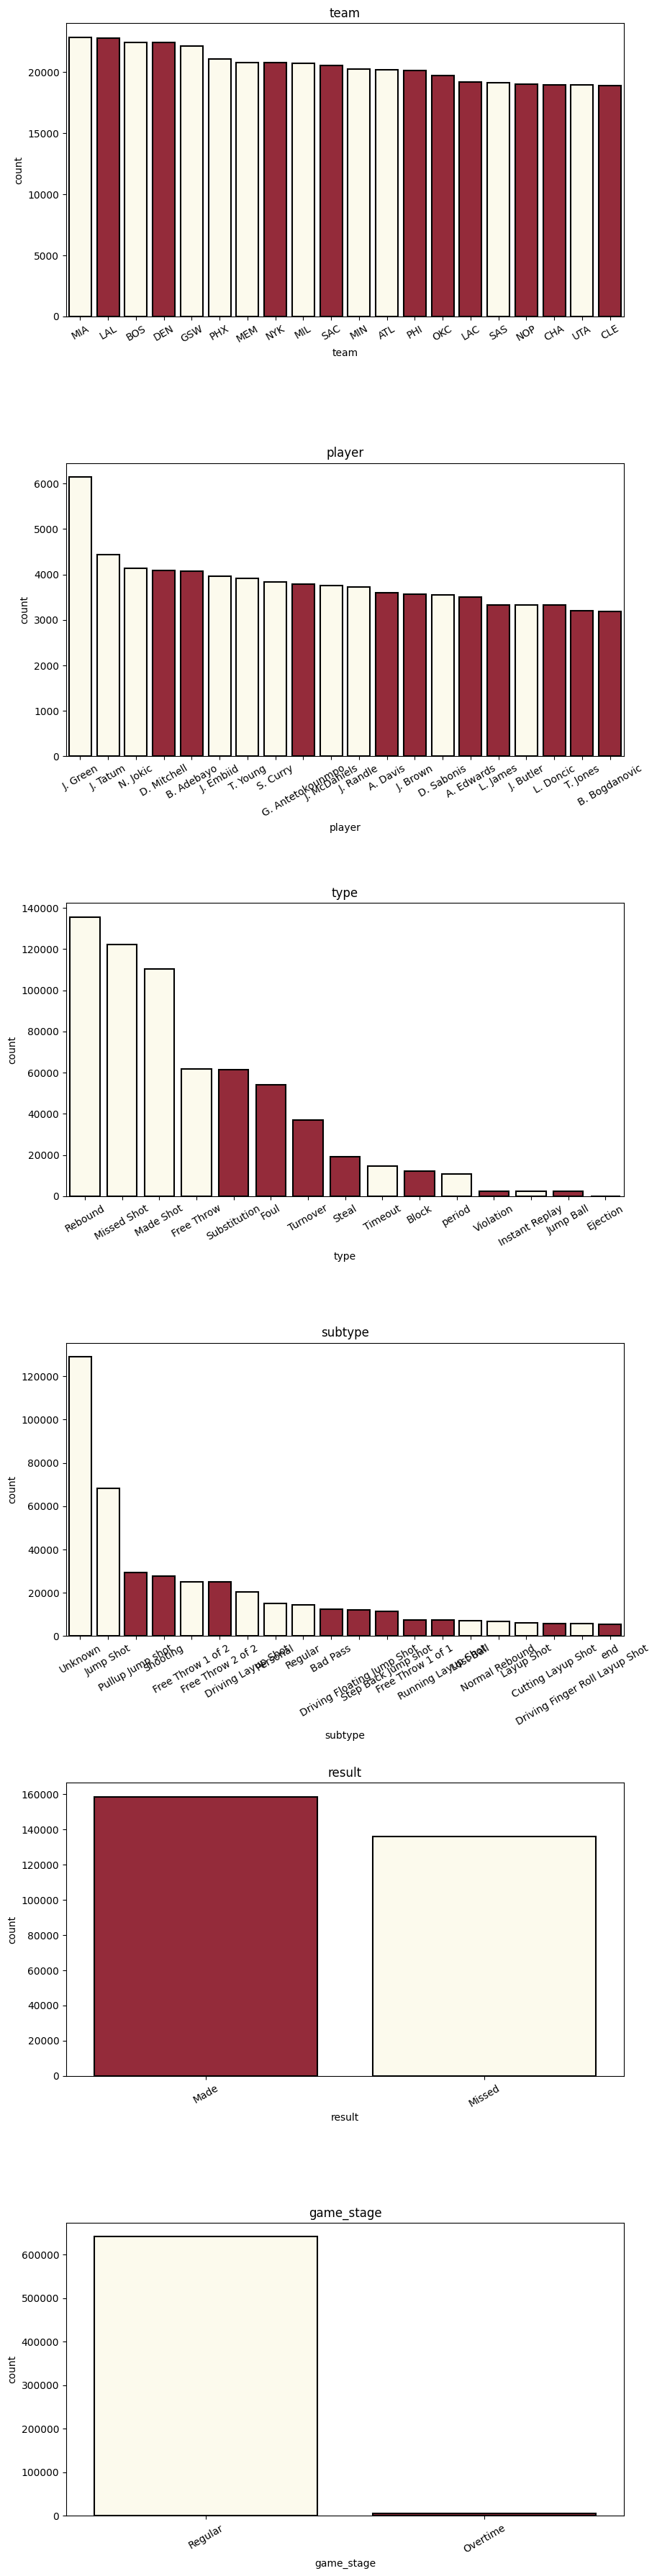

In [ ]:
# Tomemos las variables categóricas y generemos gráficos de barras
col_cat = ['team', 'player', 'type', 'subtype', 'result', 'game_stage']
# Separacion de los graficos
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10, 45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
    # Obtener el conteo de valores unicos de los 20 primeros del top
    top_categories = nba_data[col].value_counts().head(20).index
    # Filtrar la data que incluya las categorias top
    filtered_data = nba_data[nba_data[col].isin(top_categories)]
    # Crear el grafico de barras de conteo
    sns.countplot(x=col, hue=col, legend=False, data=filtered_data, ax=ax[i], order=top_categories, 
                  palette=['#FEFCEB','#A6192E'], linewidth=1.5, edgecolor='black')
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

plt.show()

## Preguntas

En esta seccion vamos a responder las preguntas planteadas.

### Pregunta 1

¿Cuales son los jugadores con mayor cantidad de tiros exitosos y tiros fallados por periodos?

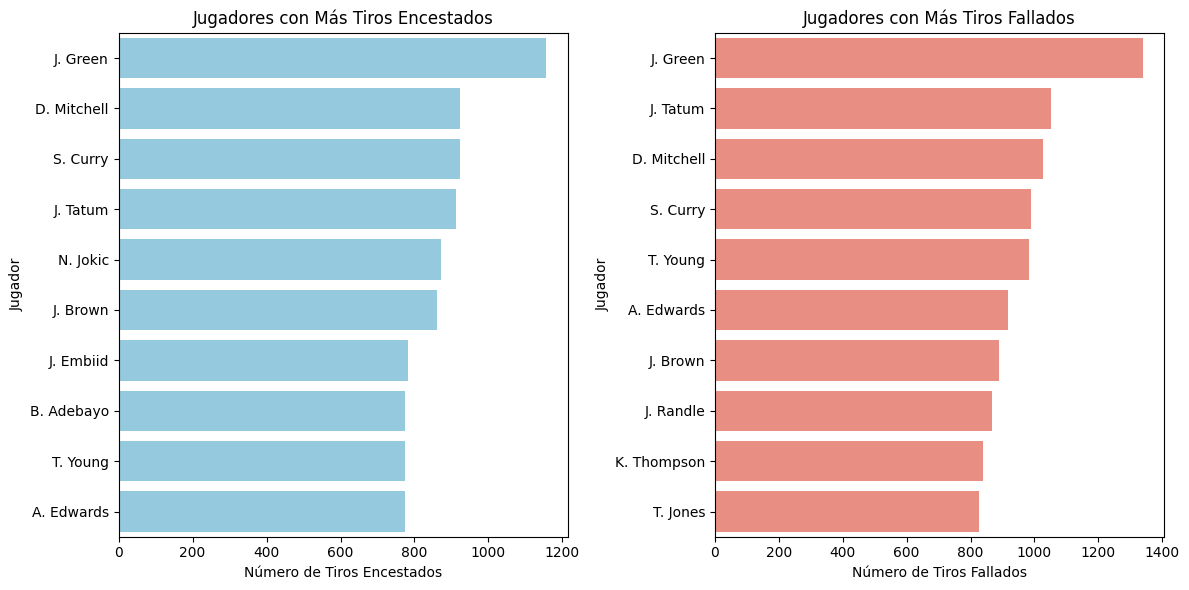

In [ ]:
shots_df = nba_data[nba_data['type'].isin(['Made Shot', 'Missed Shot'])]

# Agrupar por jugador y tipo, luego contar ocurrencias
shot_counts = shots_df.groupby(['player', 'type']).size().unstack(fill_value=0)

# Agregar una nueva columna con los tiros totales de cada jugador
shot_counts['total_shots'] = shot_counts['Made Shot'] + shot_counts['Missed Shot']

# Ordenar jugadores por tiros totales
shot_counts_sorted = shot_counts.sort_values(by='total_shots', ascending=False)

# Obtener jugadores con más tiros encestados y fallados
top_made_shot_players = shot_counts_sorted['Made Shot'].nlargest(10)
top_missed_shot_players = shot_counts_sorted['Missed Shot'].nlargest(10)

# Gráficos
plt.figure(figsize=(12, 6))

# Gráfico de barras para los jugadores con más tiros encestados
plt.subplot(1, 2, 1)
sns.barplot(x=top_made_shot_players.values, y=top_made_shot_players.index, color='skyblue')
plt.title('Jugadores con Más Tiros Encestados')
plt.xlabel('Número de Tiros Encestados')
plt.ylabel('Jugador')

# Gráfico de barras para los jugadores con más tiros fallados
plt.subplot(1, 2, 2)
sns.barplot(x=top_missed_shot_players.values, y=top_missed_shot_players.index, color='salmon')
plt.title('Jugadores con Más Tiros Fallados')
plt.xlabel('Número de Tiros Fallados')
plt.ylabel('Jugador')

plt.tight_layout()
plt.show()


### Pregunta 2

¿Que equipos obtienen mas puntos por periodo? ¿Que variables afectan el patron de puntos anotados a lo largo de un juego?

**Respuesta a: ¿Que equipos obtienen mas puntos por periodo?**

Para la prueba parte de la pregunta 2 vamos a agrupar por periodo y equipo para sumar 'pts_target'

In [ ]:
# Agrupar por period y team, y sumar los puntos
grouped = nba_data.groupby(['period', 'team'])['pts_target'].sum().reset_index()

grouped.head()


,period,team,pts_target
0,1,ATL,2689
1,1,BKN,2458
2,1,BOS,3052
3,1,CHA,2277
4,1,CHI,2383


Ploteamos para cada periodo cuales son los equipos que hicieron mas puntos:

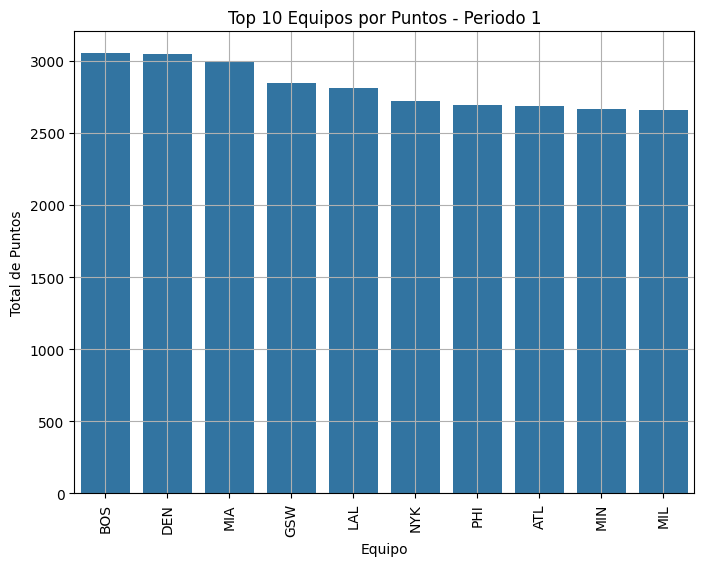

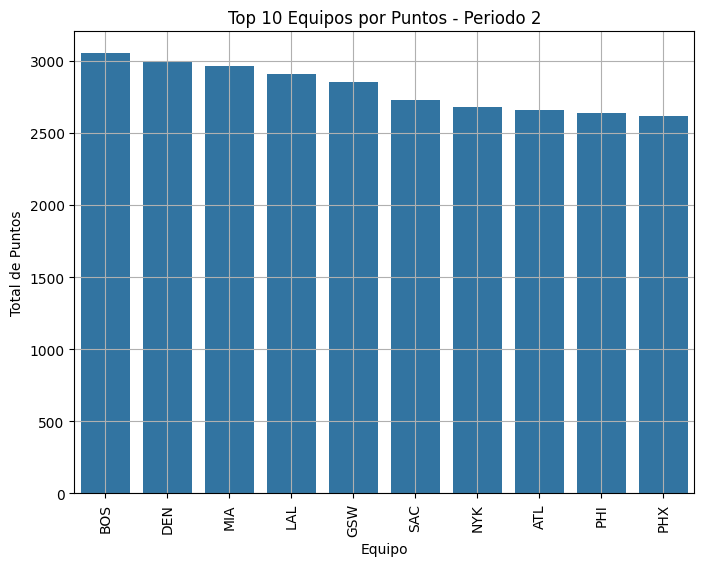

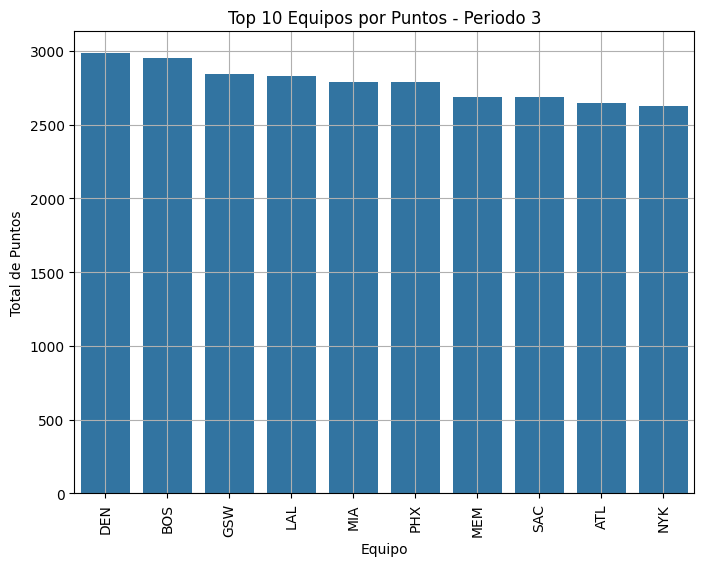

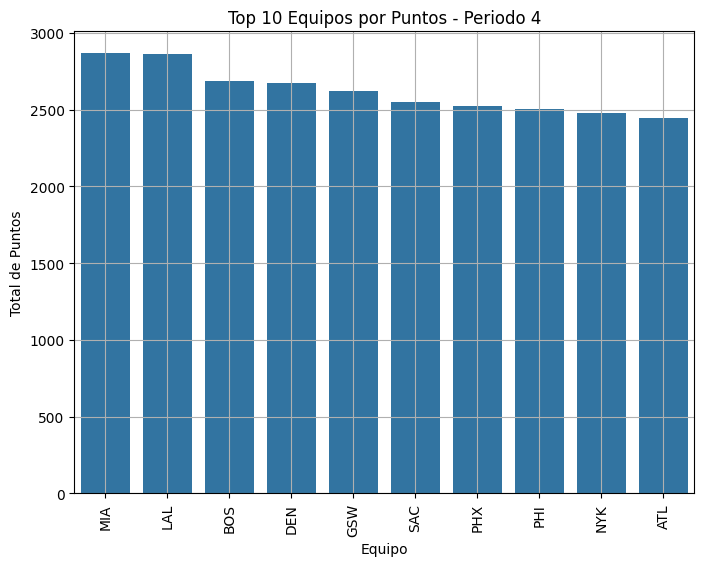

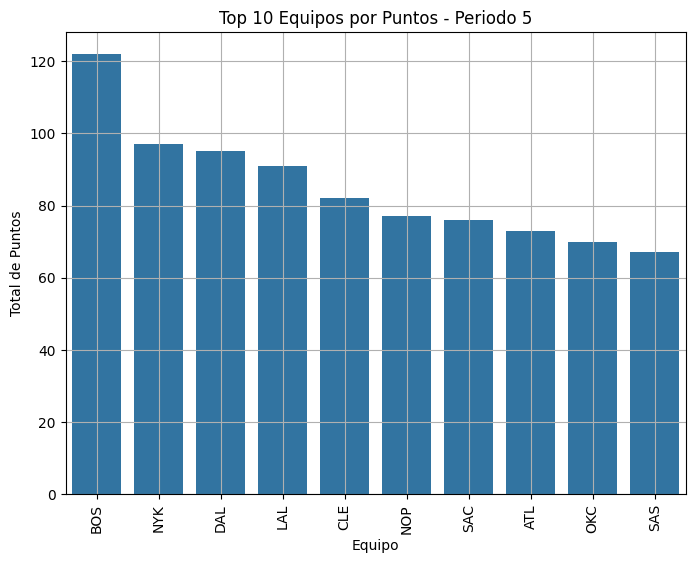

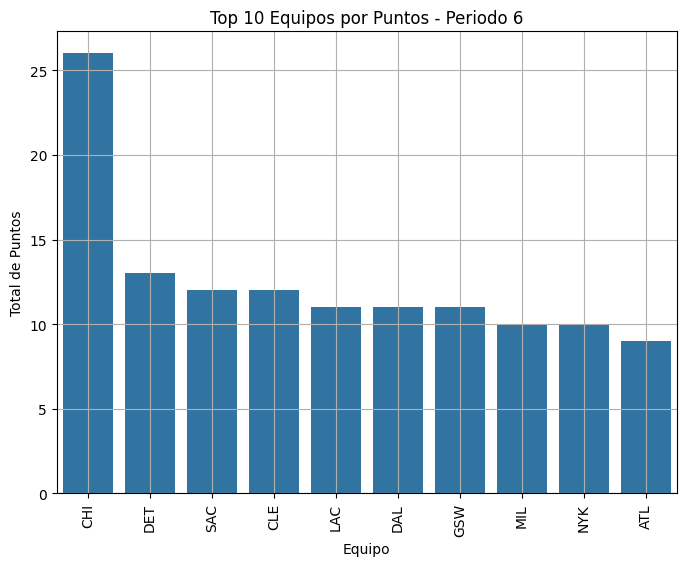

In [ ]:
# Obtener períodos únicos
unique_periods = grouped['period'].unique()

# Obtener períodos únicos
unique_periods = grouped['period'].unique()

# Plotear un gráfico independiente por cada período
for period in unique_periods:
    period_data = grouped[grouped['period'] == period]
    
    # Seleccionar los 10 mejores equipos por período
    top_10_teams = period_data.sort_values(by='pts_target', ascending=False).head(10)
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x='team', y='pts_target', data=top_10_teams, order=top_10_teams['team'])
    plt.title(f'Top 10 Equipos por Puntos - Periodo {period}')
    plt.xlabel('Equipo')
    plt.ylabel('Total de Puntos')
    plt.xticks(rotation=90)  # Rotar etiquetas del eje x
    plt.grid(True)
    plt.show()

Finalmente, ploteamos solo el equipo con mas puntos por periodo:

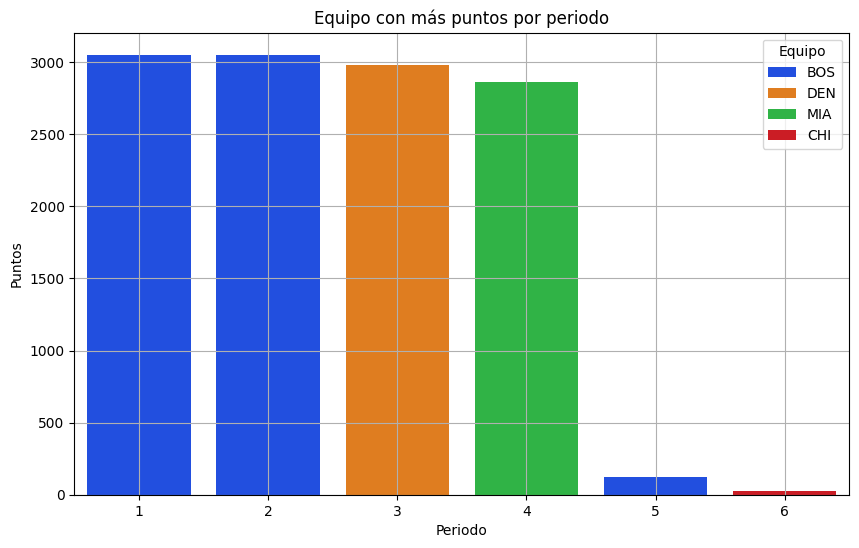

In [ ]:

# Encontrar el equipo con más puntos por periodo
max_points = grouped.loc[grouped.groupby('period')['pts_target'].idxmax()]

max_points.head()

# Ordenar los datos por período y equipo
max_points = max_points.sort_values(by=['period', 'team'])

# Plotear los resultados
plt.figure(figsize=(10, 6))
sns.barplot(x='period', y='pts_target', hue='team', data=max_points, palette='bright')
plt.title('Equipo con más puntos por periodo')
plt.xlabel('Periodo')
plt.ylabel('Puntos')
plt.legend(title='Equipo')
plt.grid(True)
plt.show()

**Respuesta a: ¿Que variables afectan el patron de puntos anotados a lo largo de un juego?**

Para responder esta pregunta vamos a implementar un decision tree para identificar las variables mas importancia para llegar a un target.

Los pasos que vamos a seguir son:

* Identificar el Target, en nuestro caso 'result' con los valores 'Made' y 'Missed'. Los 'Undefined' se eliminan y no son considerados porque son eventos que no suman puntos.
* Preparar la data para el decision tree, que contenga solo las features y el target.
* Análisis de las variables del dataset para el decision tree.
* Verificar si el taget esta alineado o no.
* Crear un clasificador de árbol de decisión cuyo objetivo sería el resultado.
* Se plotea el resultado 

In [ ]:
# Preparar la data para el decision tree, que contenga solo las features y el target.

# declare features for training and target
features = ['period', 'team', 'player',
             'minutes', 'dist',
            'game_stage', 'is_host']

target = 'result'

# select data
data = nba_data.loc[(~nba_data['team'].isnull()) & (~nba_data['player'].isnull()), features + [target]]\
               .assign(result = lambda df: np.where(df['result'] == 'Made', 1, 0))\
               .reset_index(drop = True)\
               .copy()

In [ ]:
# Análisis de las variables del dataset para el decision tree.
data.describe(include = object)

,team,player,game_stage
count,594985,594985,594985
unique,30,519,2
top,MIA,J. Green,Regular
freq,22850,6145,590730


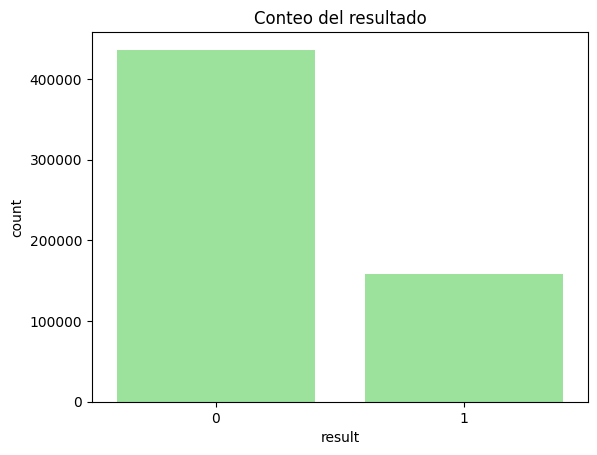

In [ ]:
# Verificar si el taget esta alineado o no.

sns.countplot(data = data,
              x = target,
              color = 'lightgreen')
              
plt.title('Conteo del resultado')
plt.show()

In [ ]:
# Crear un clasificador de árbol de decisión cuyo objetivo sería el resultado.

# split data into X and y matrices
X = data[features].copy()
y = data[target].copy()

# encode cat features
encoder = TargetEncoder(target_type = 'binary',
                        random_state = 123).set_output(transform = 'pandas')

# create transformer
transformer = make_column_transformer((encoder, make_column_selector(dtype_include = 'object')),
                                      remainder = 'passthrough',
                                      verbose_feature_names_out = False).set_output(transform = 'pandas')

# declare decision tree classifier
dtc = DecisionTreeClassifier(max_depth = 5,
                             min_samples_split = 0.05,
                             min_samples_leaf = 0.05,
                             random_state = 123)

# create pipeline
dtc_pipe = make_pipeline(transformer, dtc)

# train decision classifier
dtc_pipe.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('targetencoder',
                                                  TargetEncoder(random_state=123,
                                                                target_type='binary'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe810cb1610>)],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=0.05,
                                        min_samples_split=0.05,
                                        random_state=123))])

In [ ]:
# Score resultante

dtc_pipe.score(X, y)

0.7633738665680647

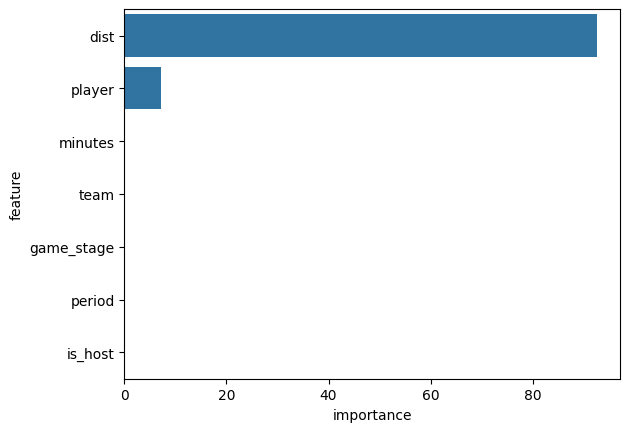

In [ ]:
# Se plotea el resultado 

importance = pd.DataFrame({'feature': dtc_pipe[-1].feature_names_in_,
                           'importance': dtc_pipe[-1].feature_importances_ * 100})\
               .sort_values(by = 'importance', ascending = False, ignore_index = True)

sns.barplot(data = importance,
            x = 'importance',
            y = 'feature')
plt.show()

Segun se muestra en el gráfico anterior las variables que mas influyen para sumar puntos son la distancia y el jugador.

### Pregunta 4

¿Que tipos de disparos son los mas efectivos? y ¿cuales los menos efectivos?

In [56]:


# Filtrar el DataFrame para incluir solo los tipos 'Made Shot' y 'Missed Shot'
shots_df = nba_data[nba_data['type'].isin(['Made Shot', 'Missed Shot'])]

# Agrupar por 'type' y 'subtype', luego contar ocurrencias
shot_counts_by_subtype = shots_df.groupby(['type', 'subtype']).size().reset_index(name='shot_count')

# Ordenar el DataFrame por conteo de tiros
shot_counts_by_subtype_sorted = shot_counts_by_subtype.sort_values(by='shot_count', ascending=False)

# Obtener los tiros más y menos efectivos para 'Made Shot' y 'Missed Shot'
tiro_mas_frecuentemente_encestado = shot_counts_by_subtype_sorted.loc[shot_counts_by_subtype_sorted['type'] == 'Made Shot'].iloc[0]
tiro_menos_frecuentemente_encestado = shot_counts_by_subtype_sorted.loc[shot_counts_by_subtype_sorted['type'] == 'Made Shot'].iloc[-1]

tiro_mas_frecuentemente_fallado = shot_counts_by_subtype_sorted.loc[shot_counts_by_subtype_sorted['type'] == 'Missed Shot'].iloc[0]
tiro_menos_frecuentemente_fallado = shot_counts_by_subtype_sorted.loc[shot_counts_by_subtype_sorted['type'] == 'Missed Shot'].iloc[-1]

print("Subtipo de 'Made Shot' más frecuente:", tiro_mas_frecuentemente_encestado['subtype'], "con", tiro_mas_frecuentemente_encestado['shot_count'], "tiros")
print("Subtipo de 'Made Shot' menos frecuente:", tiro_menos_frecuentemente_encestado['subtype'], "con", tiro_menos_frecuentemente_encestado['shot_count'], "tiros")

print("Subtipo de 'Missed Shot' más frecuente:", tiro_mas_frecuentemente_fallado['subtype'], "con", tiro_mas_frecuentemente_fallado['shot_count'], "tiros")
print("Subtipo de 'Missed Shot' menos frecuente:", tiro_menos_frecuentemente_fallado['subtype'], "con", tiro_menos_frecuentemente_fallado['shot_count'], "tiros")



Subtipo de 'Made Shot' más frecuente: Jump Shot con 25053 tiros
Subtipo de 'Made Shot' menos frecuente: Running Reverse Dunk Shot con 24 tiros
Subtipo de 'Missed Shot' más frecuente: Jump Shot con 43175 tiros
Subtipo de 'Missed Shot' menos frecuente: Running Reverse Dunk Shot con 2 tiros


/tmp/ipykernel_280/348739397.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='shot_count', y='subtype', data=top_10_most_frequently_made_shot, palette='Blues_d')
/tmp/ipykernel_280/348739397.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='shot_count', y='subtype', data=top_10_least_frequently_made_shot, palette='Reds_d')
/tmp/ipykernel_280/348739397.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='shot_count', y='subtype', data=top_10_most_frequently_missed_shot, palette='Greens_d')
/tmp/ipykernel_280/348739397.py:42: F

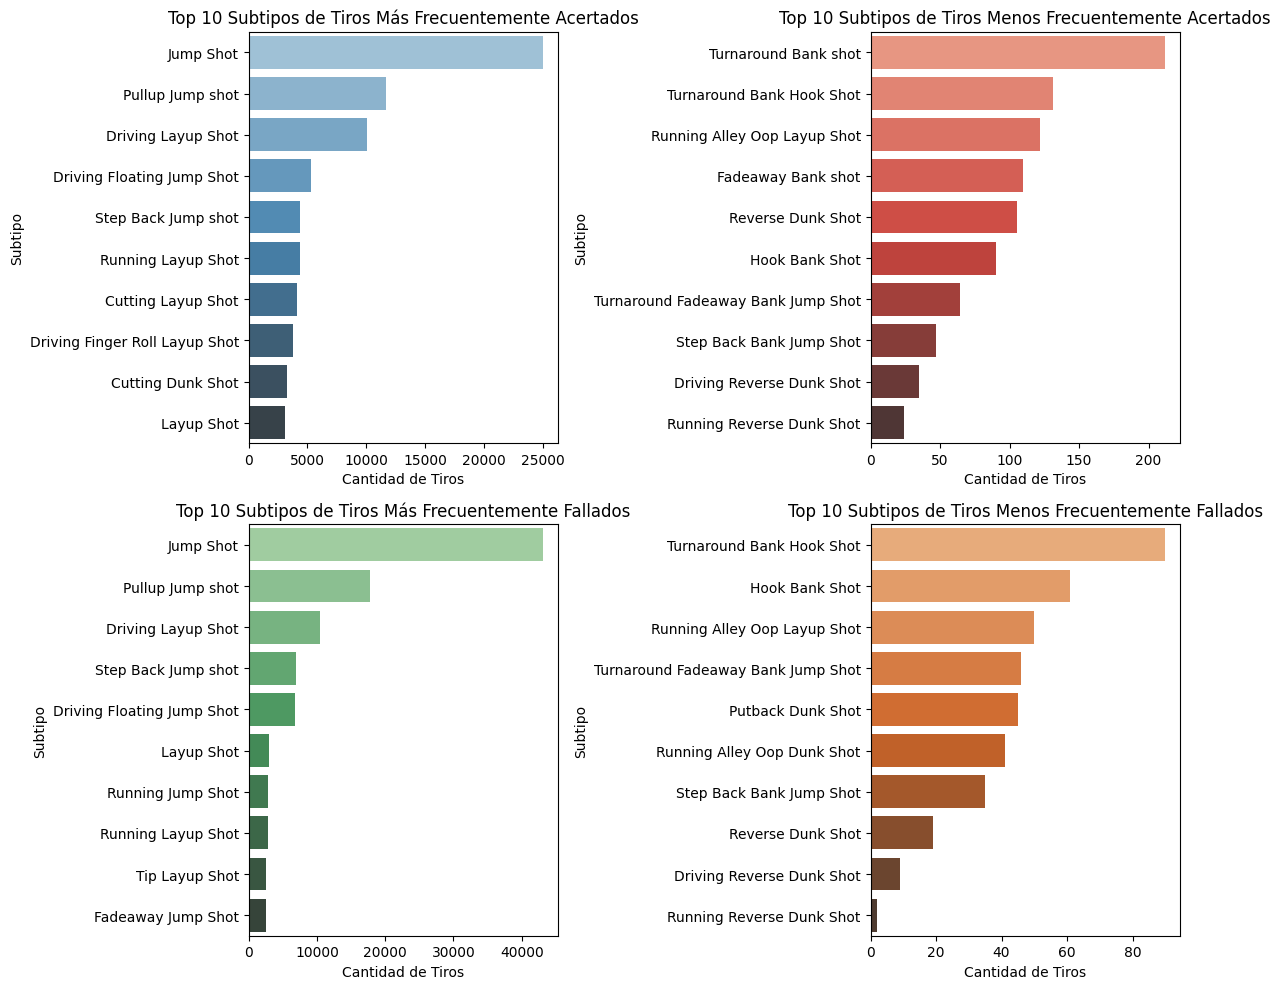

In [57]:

shots_df = nba_data[nba_data['type'].isin(['Made Shot', 'Missed Shot'])]

# Agrupar por 'type' y 'subtype', luego contar ocurrencias
shot_counts_by_subtype = shots_df.groupby(['type', 'subtype']).size().reset_index(name='shot_count')

# Ordenar el DataFrame por la cantidad de tiros
shot_counts_by_subtype_sorted = shot_counts_by_subtype.sort_values(by='shot_count', ascending=False)

# Obtener los 10 subtipos más y menos efectivos para 'Made Shot' y 'Missed Shot'
top_10_most_frequently_made_shot = shot_counts_by_subtype_sorted.loc[shot_counts_by_subtype_sorted['type'] == 'Made Shot'].head(10)
top_10_least_frequently_made_shot = shot_counts_by_subtype_sorted.loc[shot_counts_by_subtype_sorted['type'] == 'Made Shot'].tail(10)

top_10_most_frequently_missed_shot = shot_counts_by_subtype_sorted.loc[shot_counts_by_subtype_sorted['type'] == 'Missed Shot'].head(10)
top_10_least_frequently_missed_shot = shot_counts_by_subtype_sorted.loc[shot_counts_by_subtype_sorted['type'] == 'Missed Shot'].tail(10)

# Graficar usando Seaborn
plt.figure(figsize=(12, 10))

# Subtipos de tiros más frecuentemente acertados ('Made Shot')
plt.subplot(2, 2, 1)
sns.barplot(x='shot_count', y='subtype', data=top_10_most_frequently_made_shot, palette='Blues_d')
plt.title('Top 10 Subtipos de Tiros Más Frecuentemente Acertados')
plt.xlabel('Cantidad de Tiros')
plt.ylabel('Subtipo')

# Subtipos de tiros menos frecuentemente acertados ('Made Shot')
plt.subplot(2, 2, 2)
sns.barplot(x='shot_count', y='subtype', data=top_10_least_frequently_made_shot, palette='Reds_d')
plt.title('Top 10 Subtipos de Tiros Menos Frecuentemente Acertados')
plt.xlabel('Cantidad de Tiros')
plt.ylabel('Subtipo')

# Subtipos de tiros más frecuentemente fallados ('Missed Shot')
plt.subplot(2, 2, 3)
sns.barplot(x='shot_count', y='subtype', data=top_10_most_frequently_missed_shot, palette='Greens_d')
plt.title('Top 10 Subtipos de Tiros Más Frecuentemente Fallados')
plt.xlabel('Cantidad de Tiros')
plt.ylabel('Subtipo')

# Subtipos de tiros menos frecuentemente fallados ('Missed Shot')
plt.subplot(2, 2, 4)
sns.barplot(x='shot_count', y='subtype', data=top_10_least_frequently_missed_shot, palette='Oranges_d')
plt.title('Top 10 Subtipos de Tiros Menos Frecuentemente Fallados')
plt.xlabel('Cantidad de Tiros')
plt.ylabel('Subtipo')

plt.tight_layout()
plt.show()


In [58]:
nba_data.columns

Index(['gameid', 'period', 'clock', 'h_pts', 'a_pts', 'team', 'playerid',
       'player', 'type', 'subtype', 'result', 'x', 'y', 'dist', 'desc',
       'minutes', 'seconds', 'total_pts', 'game_stage', 'block_number',
       'off_rebounds', 'def_rebounds', 'steal_number', 'h_pts_diff',
       'a_pts_diff', 'pts_target', 'home_team_x', 'away_team_x', 'is_host',
       'home_team_y', 'away_team_y'],
      dtype='object')

### Pregunta 5

Que tan efectivos son algunos jugadores al hacer 'rebound', 'block' o 'steal'?

/tmp/ipykernel_280/4249534071.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='off_rebounds', y=top_offensive_rebounds_players.apply(lambda x: f"{x['player']} ({x['gameid']})", axis=1), data=top_offensive_rebounds_players, palette='Blues_d')
/tmp/ipykernel_280/4249534071.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='def_rebounds', y=top_defensive_rebounds_players.apply(lambda x: f"{x['player']} ({x['gameid']})", axis=1), data=top_defensive_rebounds_players, palette='Reds_d')
/tmp/ipykernel_280/4249534071.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for

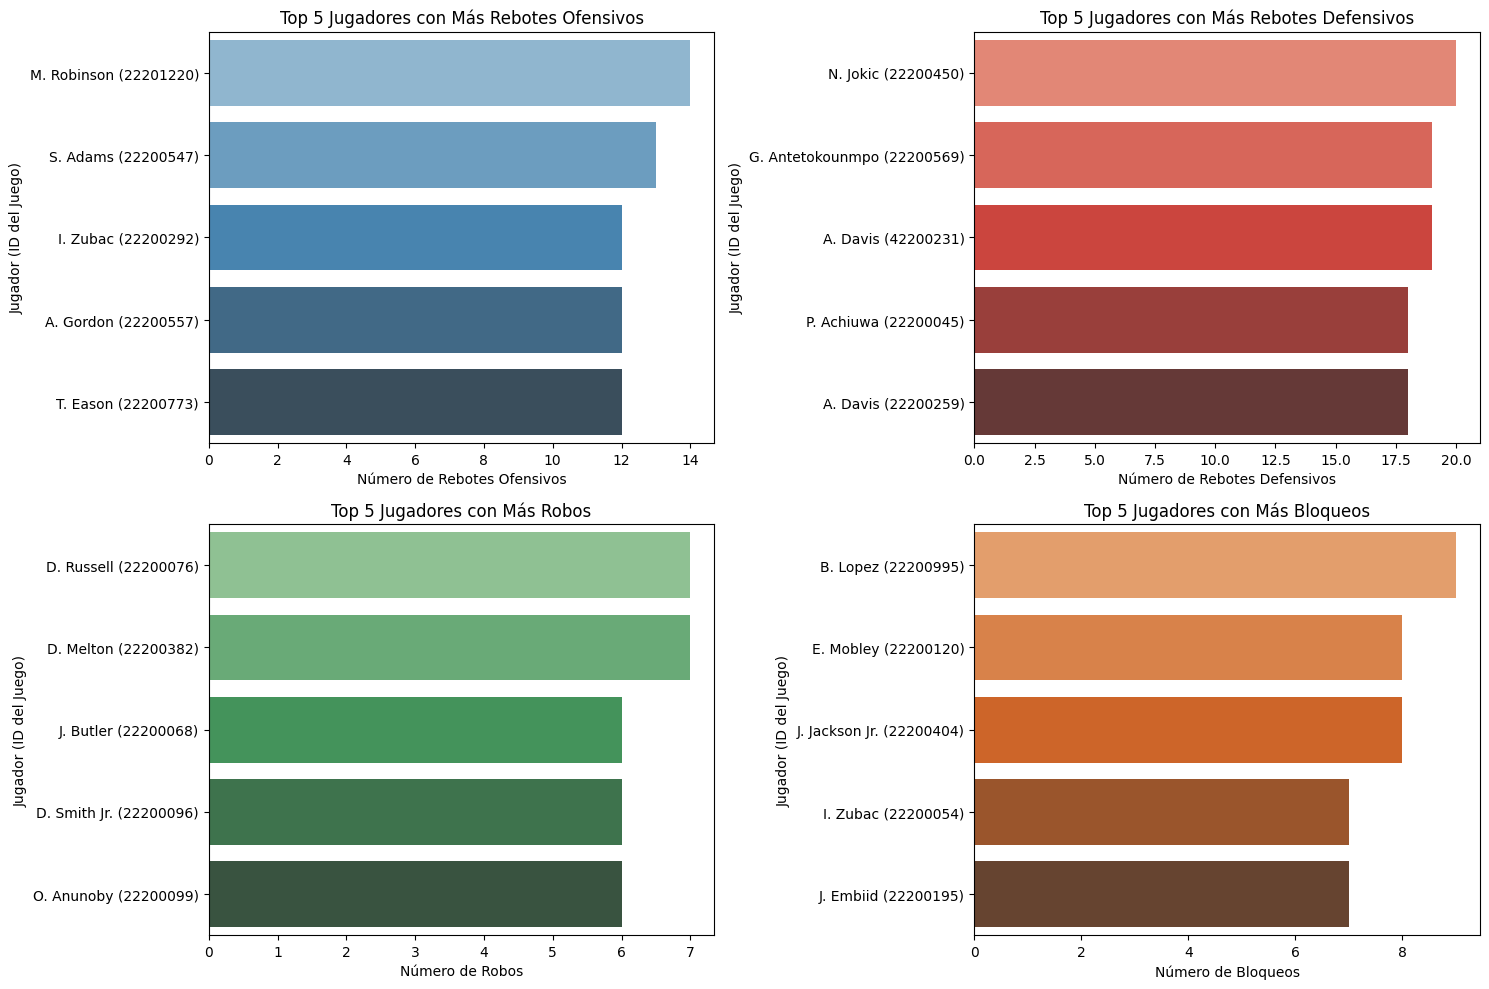

In [59]:
# Agrupar por 'gameid' y 'player' y encontrar el valor máximo para cada columna relevante
max_values_per_game = nba_data.groupby(['gameid', 'player']).agg({
    'off_rebounds': 'max',
    'def_rebounds': 'max',
    'steal_number': 'max',
    'block_number': 'max'
}).reset_index()

# Identificar a los 5 mejores jugadores para cada categoría
top_offensive_rebounds_players = max_values_per_game.nlargest(5, 'off_rebounds')
top_defensive_rebounds_players = max_values_per_game.nlargest(5, 'def_rebounds')
top_steals_players = max_values_per_game.nlargest(5, 'steal_number')
top_blocks_players = max_values_per_game.nlargest(5, 'block_number')

# Graficar usando Seaborn
plt.figure(figsize=(15, 10))

# Rebotes ofensivos
plt.subplot(2, 2, 1)
sns.barplot(x='off_rebounds', y=top_offensive_rebounds_players.apply(lambda x: f"{x['player']} ({x['gameid']})", axis=1), data=top_offensive_rebounds_players, palette='Blues_d')
plt.title('Top 5 Jugadores con Más Rebotes Ofensivos')
plt.xlabel('Número de Rebotes Ofensivos')
plt.ylabel('Jugador (ID del Juego)')

# Rebotes defensivos
plt.subplot(2, 2, 2)
sns.barplot(x='def_rebounds', y=top_defensive_rebounds_players.apply(lambda x: f"{x['player']} ({x['gameid']})", axis=1), data=top_defensive_rebounds_players, palette='Reds_d')
plt.title('Top 5 Jugadores con Más Rebotes Defensivos')
plt.xlabel('Número de Rebotes Defensivos')
plt.ylabel('Jugador (ID del Juego)')

# Robos
plt.subplot(2, 2, 3)
sns.barplot(x='steal_number', y=top_steals_players.apply(lambda x: f"{x['player']} ({x['gameid']})", axis=1), data=top_steals_players, palette='Greens_d')
plt.title('Top 5 Jugadores con Más Robos')
plt.xlabel('Número de Robos')
plt.ylabel('Jugador (ID del Juego)')

# Bloqueos
plt.subplot(2, 2, 4)
sns.barplot(x='block_number', y=top_blocks_players.apply(lambda x: f"{x['player']} ({x['gameid']})", axis=1), data=top_blocks_players, palette='Oranges_d')
plt.title('Top 5 Jugadores con Más Bloqueos')
plt.xlabel('Número de Bloqueos')
plt.ylabel('Jugador (ID del Juego)')

plt.tight_layout()
plt.show()


### Pregunta 8

¿En que posicion del campo ocurren mas jugadas?

/tmp/ipykernel_280/1631349339.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quadrant', data=nba_data, palette='pastel')


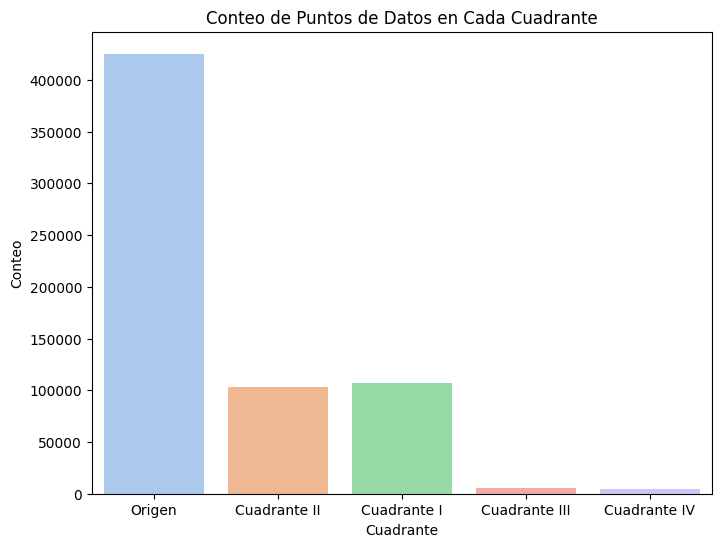

In [64]:
# Definir una función para determinar el cuadrante basado en los valores de x e y
def get_quadrant(x, y):
    if x > 0 and y > 0:
        return 'Cuadrante I'
    elif x < 0 and y > 0:
        return 'Cuadrante II'
    elif x < 0 and y < 0:
        return 'Cuadrante III'
    elif x > 0 and y < 0:
        return 'Cuadrante IV'
    else:
        return 'Origen'

# Aplicar la función para crear una nueva columna 'quadrant' (cuadrante)
nba_data['quadrant'] = nba_data.apply(lambda row: get_quadrant(row['x'], row['y']), axis=1)

# Graficar usando Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='quadrant', data=nba_data, palette='pastel')
plt.title('Conteo de Puntos de Datos en Cada Cuadrante')
plt.xlabel('Cuadrante')
plt.ylabel('Conteo')
plt.show()


### Pregunta 9

Puntos totales por partido en promedio

In [67]:
# Agrupar por 'gameid' y encontrar el valor máximo de 'total_points' en cada grupo
total_points_per_game = nba_data.groupby('gameid')['total_pts'].max()

# Calcular el valor promedio de 'total_points' en todos los grupos
mean_total_points = total_points_per_game.mean()

print("Total de puntos por juegos:")
print(total_points_per_game.head())

print("\nPromedio de puntos totales de todos los juegos:", mean_total_points)




Total de puntos por juegos:
gameid
22200001    243
22200002    232
22200003    222
22200004    221
22200005    224
Name: total_pts, dtype: int64

Promedio de puntos totales de todos los juegos: 228.64063684609553


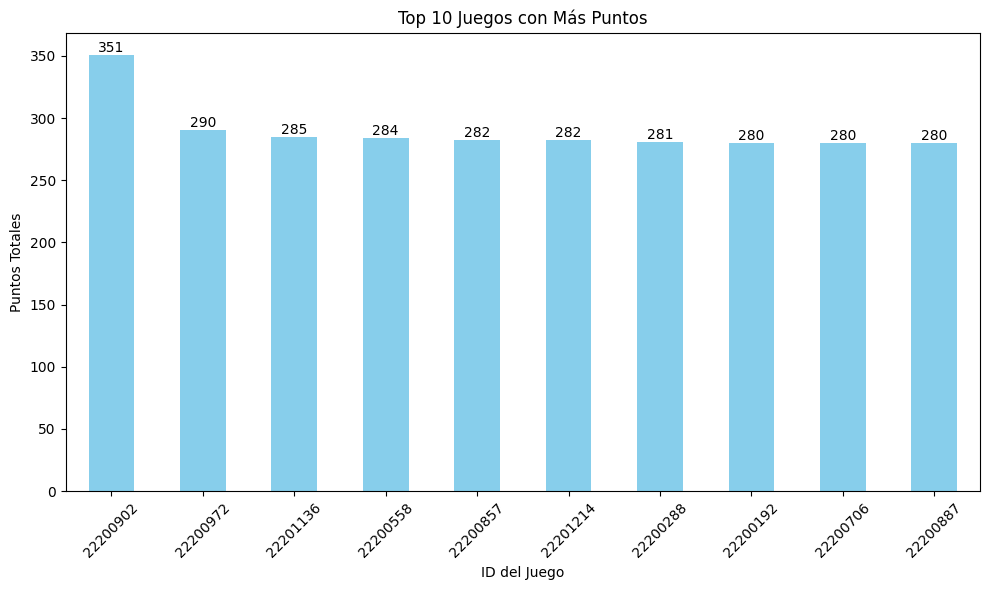

In [68]:
# Ordenar los juegos en función de los puntos totales en orden descendente y seleccionar los 10 mejores juegos
top_10_games = total_points_per_game.nlargest(10)

# Graficar
plt.figure(figsize=(10, 6))
bar_plot = top_10_games.plot(kind='bar', color='skyblue')
plt.title('Top 10 Juegos con Más Puntos')
plt.xlabel('ID del Juego')
plt.ylabel('Puntos Totales')
plt.xticks(rotation=45)

# Anotar cada barra con su valor correspondiente
for i, v in enumerate(top_10_games):
    plt.text(i, v, str(int(v)), ha='center', va='bottom')

plt.tight_layout()
plt.show()
